# 12 Missing Data
File(s) needed: office_visits.csv, Taiwan_CellSurvey_RAW.xlsx, conditioning_example.csv


# Why is data missing?

대부분의 데이터셋은(실습데이터가 아닌 실제 데이터) 결측치 즉 missing data가 존재합니다. 설문조사에 응답하지 않았다던가, 서베이의 설계에 있어 미싱이 생길 수 도 있습니다. 아니면 오히려 우리가 데이터작업을 하는 동안 발생할 수도 있습니다! 

설문조사를 예를 들어 보겠습니다.
```
1. 현재 직장에 다니고 있나요? Yes or No
2. 만약 1번 질문에서 'Yes'를 고르셨다면 full-time인가요 part-time인가요? Full-time or Part-time
```


이 경우 직장에 다니고 있지 않은, 즉 1번 문항에 'No'를 선택한 사람은 2번 문항은 빈 값, 즉 결측치가 될 것입니다. 


이러한 경우로, 데이터를 처리할 때 결측치가 생길 수 있습니다. 이러한 결측치가 생겼다고 해서 해당 설문조사를 무효로 만들 수는 없기 때문에 이러한 결측치를 처리하는 법에 대해서 배워봅시다!

우선 이러한 작업을 시작하기 앞서 데이터셋의 결측치를 처리할 때 반드시 해결해야 할 세가지가 있습니다.

1. 우선 결측치를 찾아야 합니다.
2. 일관성있는 코딩으로 처리해야 합니다. (그러한 결측치들에 동일한 방식으로 값을 주어야합니다.)
3. 이러한 코딩으로 결측치를 대신할 특정한 무언가를 넣어야합니다.



In [59]:
import pandas as pd

## Loading data
결측치는 다음과 같은 여러가지 방법으로 데이터에 나타납니다 : 
- null values
- NaN (pandas)
- None (Python 3.x)
- NA (R)
- 지정된 값, 예를들어 이 데이터셋에서 -999 라는 값은 결측치를 의미

판다스에서는 이러한 결측치들을 `NaN` 로 표현합니다. 하지만 파이썬자체에서는 `None` 라는 표현을 사용하고 `NA`혹은 `Null`로 표현하는 값을 만날 수도 있습니다. 이런 경우에`pd.read_csv` 구문에서 이러한 다양한 결측치 들을 판다스에서 사용하는 `NaN`값으로 모두 변환해줄 수 있습니다. `pd.read_csv`에 이러한 결측치들을 처리하는 파라미터들은 다음과 같습니다.s:
- `na_values` 
    - 이 구문은 결측치로 간주되어야하는 값을 지정해주면 판다스에서 자동으로 그 특정 값을 결측치로 인지해줍니다. 예를들어 -999가 결측치의 의미를 갖는 데이터셋이라면 `na_values=[-999]` 라는 구문을 넣음으로써 -999가 `NaN`로 나타나게 해줍니다.
    
    - 인지하셔야할 점은, 등호의 오른쪽 값은 List이므로 여러 값을 쉼표로 구분하여 포함해줄 수 있습니다.
- `keep_default_na` 
    - 이 구문은 `na_values`와 함께 사용됩니다.
    - 만약 `True`즉 기본값인 경우 NA및 NaN 같은 값들은 `na_values` 구문에서 지정한 값이 아니어도 결측치로 차리가 됩니다.
    - 하지만 `False`면 지정된 리스트값만 결측치로 간주합니다. 
- `na_filter` 
    - 어떤 값이든 결측치로 코딩을 할지 여부를 정하는 구문입니다.
    - 만약 `True` (기본값)면, 결측치는 `NaN`로 코딩이 됩니다.
    - 만약 `False`면, 결측치가 되는 값은 없습니다.

In [60]:
# 파일을 불러오기합니다.
my_file = "../data/office_visits.csv"

In [61]:
#office_visits.csv 데이터를 확인해봅니다. 또한 my_file이라는 변수에 경로를 넣어두었기에 아래와 같이 사용가능합니다
#df = pd.read_csv("../data/office_visits.csv")
df = pd.read_csv(my_file)
df

,ident,site,dated,cost
0,619,-999,2/8/1927,250.35
1,622,DR-1,2/10/1927,98.65
2,734,DR-3,NaN,678
3,735,DR-3,1/12/1930,135.64
4,751,DR-3,2/26/1930,None
5,752,DR-3,NaN,854
6,837,MSK-4,1/14/1932,NaN
7,844,DR-1,3/22/1932,45


In [25]:
# na_values구문으로 office_visit_데이터셋에 있는 -999값을 결측치로 처리해준다.
df = pd.read_csv(my_file, na_values=[-999])
df

,ident,site,dated,cost
0,619,NaN,2/8/1927,250.35
1,622,DR-1,2/10/1927,98.65
2,734,DR-3,NaN,678
3,735,DR-3,1/12/1930,135.64
4,751,DR-3,2/26/1930,None
5,752,DR-3,NaN,854
6,837,MSK-4,1/14/1932,NaN
7,844,DR-1,3/22/1932,45


In [26]:
# office_visits.csv를 읽어온다음 -999값만 결측치로 처리해준다.
df = pd.read_csv(my_file, na_values=[-999], keep_default_na=False)
df

,ident,site,dated,cost
0,619,NaN,2/8/1927,250.35
1,622,DR-1,2/10/1927,98.65
2,734,DR-3,NA,678
3,735,DR-3,1/12/1930,135.64
4,751,DR-3,2/26/1930,None
5,752,DR-3,,854
6,837,MSK-4,1/14/1932,NaN
7,844,DR-1,3/22/1932,45


### The bottom line on handling missing values while reading data
대부분 결측치들은 특정 값을 대체하는 값을 갖도록 하는게 좋습니다. 따라서 이를 위해 `pd.read_csv` 구문을 사용해주겠습니다.

중요: 만약 "NA"값이 데이터에 유효한 응답일 경우 이를 처리할때 조심히 처리해야합니다.

#### 결측치가 있는 큰 데이터파일 로드

`Taiwan_CellSurvey_RAW.xlsx` 파일은 실제 서베이 결과를 포함하는 데이터셋입니다



In [62]:

import pandas as pd

# 출력할때 모든 컬럼이 보여지게끔 출력하기
pd.options.display.max_columns = 150

df2 = pd.read_csv("../data/Taiwan_CellSurvey_RAW.csv")

In [63]:
# 데이터가 어떻게 생겼는지 볼까요?
#df2.describe()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 54 columns):
SurveyID           272 non-null object
Age                257 non-null float64
Gender             272 non-null int64
Type               272 non-null int64
Education          272 non-null int64
Income             263 non-null float64
Employed           271 non-null float64
FullPart           82 non-null float64
@1OwnCell          261 non-null float64
@2UsedCell         261 non-null float64
@3OwnHousePhone    266 non-null float64
@4UseFreq          270 non-null float64
BQ4a               270 non-null float64
BQ4aCont           270 non-null float64
@5UseLength        268 non-null float64
BQ5a               268 non-null float64
BQ5aCont           268 non-null float64
@6aTexting         202 non-null float64
@6bEmail           90 non-null float64
@6cInternet        83 non-null float64
@6dBank            15 non-null float64
@6eBills           14 non-null float64
@6fFacebook        31 non-n

# Finding missing values

`df2.info()`구문으로 데이터를 확인해봤습니다. 이때 우리는 상당히 많은 결측치들이 존재하는 것을 확인할 수 있었습니다. 이러한 결측치들이 어디에 존재하는지 알아보기 위해 `isna()` 메소드를 사용하겠습니다.

You can also get a frequency count of values in a column with the dataframe method `value_counts`에 `dropna=False` 구문을 사용하면 Null값까지 카운트에 포함하여 컬럼의 빈도를 확인할 수 있습니다. 이 구문은 특히 카테고리컬 변수에 사용하기 유용합니디.

In [66]:
df2['BQ5a']

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
6      2.0
7      2.0
8      4.0
9      6.0
10     NaN
11     2.0
12     NaN
13     6.0
14     2.0
15     5.0
16     2.0
17     1.0
18     1.0
19     2.0
20     6.0
21     1.0
22     3.0
23     1.0
24     4.0
25     2.0
26     6.0
27     1.0
28     1.0
29     2.0
      ... 
242    2.0
243    2.0
244    2.0
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
250    1.0
251    1.0
252    1.0
253    1.0
254    0.0
255    1.0
256    2.0
257    4.0
258    1.0
259    2.0
260    4.0
261    1.0
262    1.0
263    1.0
264    1.0
265    2.0
266    2.0
267    NaN
268    2.0
269    1.0
270    0.0
271    1.0
Name: BQ5a, Length: 272, dtype: float64

In [68]:

#df2.BQ5a.value_counts()
df2.BQ5a.value_counts(dropna=False)
#df2['@6aTexting'].value_counts(dropna=False)
#df2['@6aTexting'].value_counts(dropna=False).head()

 1.0    116
 2.0     83
 6.0     19
 4.0     19
 0.0     14
 3.0     10
 5.0      7
NaN       4
Name: BQ5a, dtype: int64

## Handling missingness

일단 데이터에 누락된 결측치들이 있는지 확인을 해보았습니다. 이제는 그 결측치들을 일관성있게 코딩을 해야하는데 이에 대한 방법은 세가지가 있습니다 : 
1. 결측치를 무시한다.
2. 결측치가 있는 row를 삭제한다.
3. 결측치를 특정값으로 대체한다.

1번째 방법은 분석에 있어서 예상치 못한 결과를 초래할 수 있습니다. 따라서 일단 데이터를 삭제하는 방법을 알아보겠습니다. `dropna()` 메소드를 사용하면 결측치를 가진 행들을 삭제할 수 있습니다. 하지만 이방법은 대체로 사용되지 않으며 가장 흔한 방법은 결측치를 특정값으로 대체하는 것 입니다.

### Filling in with a single value
`fillna()` 를 사용하여 결측치를 특정 값으로 대체해줄 수 있습니다.

In [69]:
df2

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
0,S4,NaN,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
1,S5,NaN,1,1,3,2.0,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
2,S8,NaN,2,1,2,2.0,2.0,NaN,25.00,25.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
3,S12,NaN,2,1,2,3.0,2.0,NaN,12.00,12.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
4,S13,NaN,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3
5,S14,NaN,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
6,S15,NaN,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,NaN,2
7,S16,NaN,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,5.0,1.0,3,2,2,2,2,3,3,4,3,3,2,4.9,3.5,4,4,4,NaN,3
8,S35,NaN,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,NaN,4
9,S37,NaN,1,1,4,5.0,1.0,1.0,8.00,8.00,1.0,5.0,4.0,12.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,3.0,-1.0,4,4,4,2,2,4,2,4,2,4,1,5.6,2.1,5,5,4,NaN,4


In [70]:
# Age컬럼에 결측치를 60으로 대체해주겠습니다.
#df2.fillna(value=60)   # 이런식으로 코딩할 경우 모든 컬럼의 결측치에 60이란 값이 들어갑니다.

fill_value = {'Age':60}
df2.fillna(value={'Age':60})

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
0,S4,60.0,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
1,S5,60.0,1,1,3,2.0,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
2,S8,60.0,2,1,2,2.0,2.0,NaN,25.00,25.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
3,S12,60.0,2,1,2,3.0,2.0,NaN,12.00,12.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
4,S13,60.0,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3
5,S14,60.0,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
6,S15,60.0,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,NaN,2
7,S16,60.0,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,5.0,1.0,3,2,2,2,2,3,3,4,3,3,2,4.9,3.5,4,4,4,NaN,3
8,S35,60.0,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,NaN,4
9,S37,60.0,1,1,4,5.0,1.0,1.0,8.00,8.00,1.0,5.0,4.0,12.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,3.0,-1.0,4,4,4,2,2,4,2,4,2,4,1,5.6,2.1,5,5,4,NaN,4


결측치를 대체할 수 있는 통계적인 스킬은 전문적이고 깊은 분야로 넘어가기때문에 패스하도록 하겠습니다. 하지만 간단한 방법으로 결측치를 다른 특정한 값으로 대체할 수는 있습니다. 그 특정한 값은 평균, 중앙값, 최빈값이 될 수 있습니다.

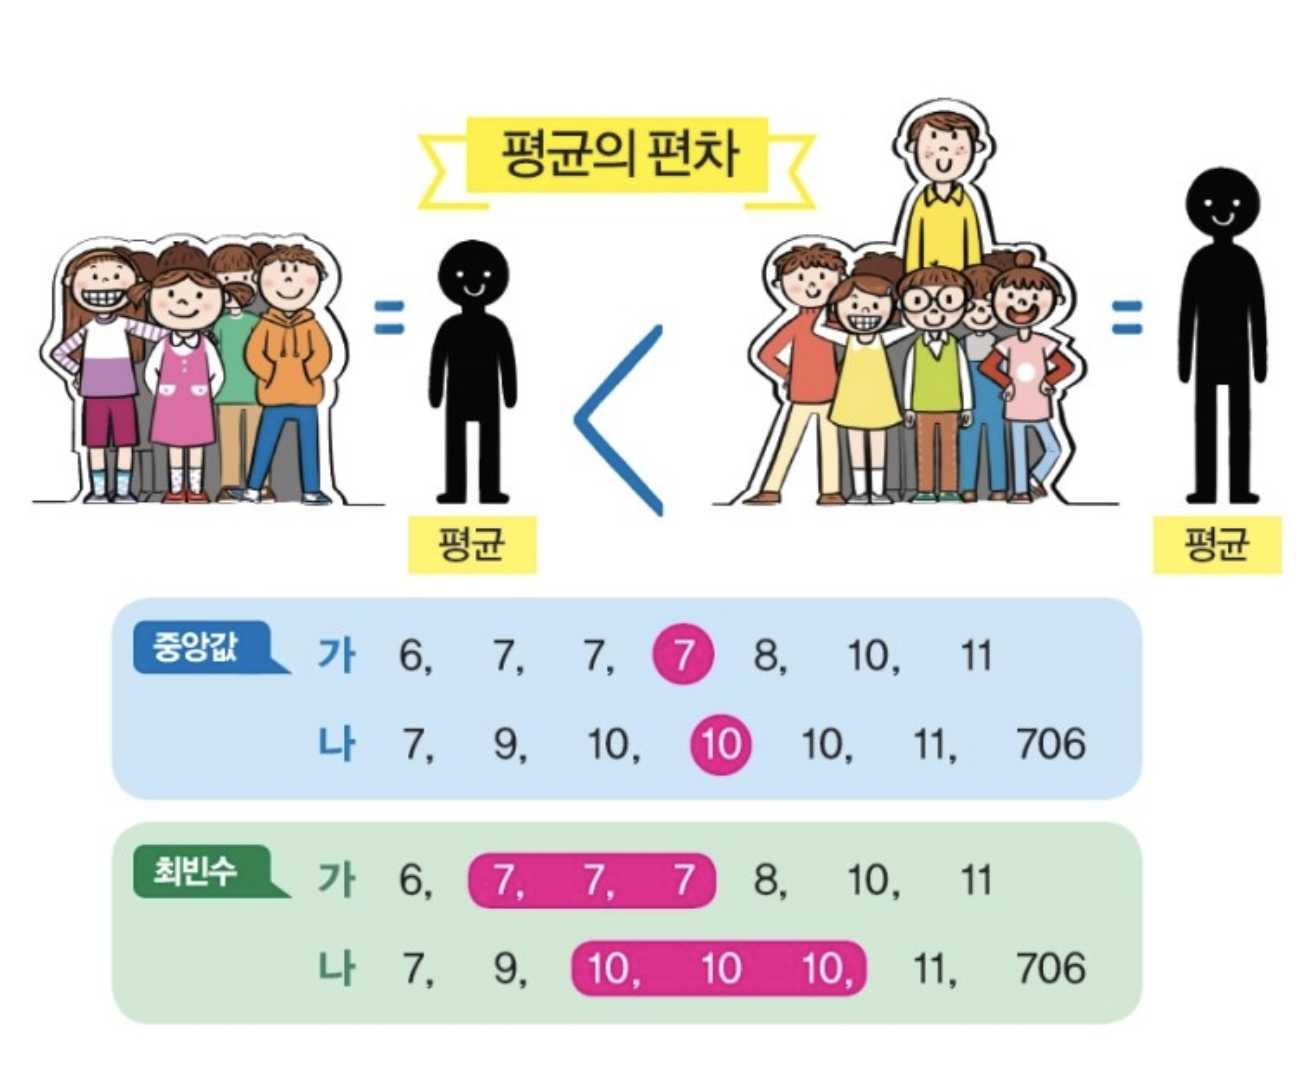

In [71]:
# Age컬럼의 평균, 중앙값, 최빈값을 알아봅시다
print('Mean: ',df2['Age'].mean())
print('Mean: ',round(df2['Age'].mean(),1))
print('Median: ', df2['Age'].median())
print('Mode: ', df2['Age'].mode())

Mean:  63.400778210116734
Mean:  63.4
Median:  62.0
Mode:  0    60.0
dtype: float64


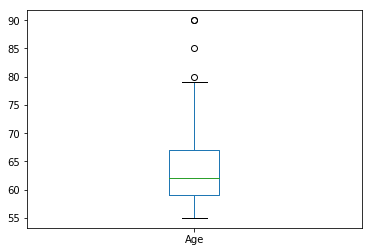

In [72]:
# 어느 값을 사용해야 할까요?
df2['Age'].plot.box()

In [34]:
# Example: 결측치를 평균, 중앙값, 최빈값으로 대체해봅시다.
fill_value = {'Age': round(df2['Age'].mean(),1)}    # rounded mean
#fill_value = {'Age': df2['Age'].mean()}
#fill_value = {'Age': df2['Age'].median()}
#fill_value = {'Age': df2['Age'].mode()} # 이 방법은 에러가 날 수 있습니다.

# 아래와 같이 정수형으로 변형시켜줘야 합니다!
#fill_value = {'Age': int(df2['Age'].mode())}

df2.fillna(value=fill_value)

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
0,S4,63.4,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
1,S5,63.4,1,1,3,2.0,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
2,S8,63.4,2,1,2,2.0,2.0,NaN,25.00,25.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
3,S12,63.4,2,1,2,3.0,2.0,NaN,12.00,12.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
4,S13,63.4,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3
5,S14,63.4,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
6,S15,63.4,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,NaN,2
7,S16,63.4,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,5.0,1.0,3,2,2,2,2,3,3,4,3,3,2,4.9,3.5,4,4,4,NaN,3
8,S35,63.4,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,NaN,4
9,S37,63.4,1,1,4,5.0,1.0,1.0,8.00,8.00,1.0,5.0,4.0,12.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,3.0,-1.0,4,4,4,2,2,4,2,4,2,4,1,5.6,2.1,5,5,4,NaN,4


In [73]:
# df2 데이터프레임을 다시 확인해볼까요? 다시 확인해보면 NaN값이 그대로 있는 것을 볼 수 있습니다.
# inplace 옵션을 통해 저장을 해줘야합니다!
df2.head()

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
0,S4,NaN,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
1,S5,NaN,1,1,3,2.0,2.0,NaN,10.0,10.0,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
2,S8,NaN,2,1,2,2.0,2.0,NaN,25.0,25.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
3,S12,NaN,2,1,2,3.0,2.0,NaN,12.0,12.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
4,S13,NaN,2,1,3,NaN,2.0,NaN,10.0,10.0,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3


In [74]:
# inplace 기능을 사용하여 NaN를 다른 값으로 대체해준 것을 저장해줍시다
fill_value = {'Age': df2['Age'].mean()}

df2.fillna(value=fill_value, inplace=True)
df2.head()

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
0,S4,63.400778,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
1,S5,63.400778,1,1,3,2.0,2.0,NaN,10.0,10.0,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
2,S8,63.400778,2,1,2,2.0,2.0,NaN,25.0,25.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
3,S12,63.400778,2,1,2,3.0,2.0,NaN,12.0,12.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
4,S13,63.400778,2,1,3,NaN,2.0,NaN,10.0,10.0,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3


### Dropping rows with missing values

위에도 언급했듯이 이 방법은 가장 좋은 최선책은 아닙니다. 하지만 필요할 때가 있으면 사용해야할 수도 있습니다. `dropna()`메소드를 사용하여 결측치가 있는 row를 지워줍시다.

In [75]:
# 결측치가 있는 모든 행들을 지워줍니다.
df2.dropna()

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001


In [77]:
# Age컬럼에 결측치가 있는 행들은 모두 지워줍니다
df2.dropna(subset=['FullPart'])

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
5,S14,63.400778,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
6,S15,63.400778,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,NaN,2
8,S35,63.400778,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,NaN,4
9,S37,63.400778,1,1,4,5.0,1.0,1.0,8.00,8.00,1.0,5.0,4.0,12.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,3.0,-1.0,4,4,4,2,2,4,2,4,2,4,1,5.6,2.1,5,5,4,NaN,4
13,S49,63.400778,2,1,3,4.0,1.0,1.0,15.00,15.00,1.0,7.0,6.0,56.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,8.0,3.0,6.0,2.0,1,1,1,1,5,5,5,5,4,5,1,7.0,3.5,10,10,8,NaN,3
14,S38,55.000000,1,1,3,3.0,1.0,1.0,20.00,20.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,2.0,-2.0,1,2,2,1,1,1,1,4,1,5,1,6.3,1.4,5,1,5,NaN,3
20,W124,55.000000,2,4,3,1.0,1.0,1.0,10.00,8.00,1.0,7.0,6.0,56.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,7,3,3,7,7,2,7,2,7.0,2.0,9,9,9,NaN,4
21,W129,55.000000,2,1,2,5.0,1.0,2.0,8.00,8.00,1.0,7.0,6.0,56.0,2.0,1.0,0.25,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,7.0,2.0,5.0,1.0,6,6,6,6,6,4,6,6,4,6,5,6.0,4.5,7,7,7,NaN,2
23,W143,55.000000,2,1,2,5.0,1.0,2.0,10.00,8.00,1.0,7.0,6.0,56.0,2.0,1.0,0.25,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,3.0,-2.0,3.0,-1.0,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2,2,2,NaN,2
25,W217,55.000000,1,1,1,3.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,7.0,2.0,5.0,1.0,5,5,6,6,6,6,5,7,4,6,5,6.5,4.5,8,8,9,NaN,1


#### 컬럼을 지우는 법을 기억하시나요? Comments컬럼에는 아무 값도 없으니 컬럼을 지워봅시다

In [78]:
df2.drop('Comments', axis=1)

#df2.drop('Comments', axis=1, inplace=True)
#df2.head()

,SurveyID,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,VAR00001
0,S4,63.400778,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,3
1,S5,63.400778,1,1,3,2.0,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,3
2,S8,63.400778,2,1,2,2.0,2.0,NaN,25.00,25.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,2
3,S12,63.400778,2,1,2,3.0,2.0,NaN,12.00,12.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,2
4,S13,63.400778,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,3
5,S14,63.400778,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,3
6,S15,63.400778,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,2
7,S16,63.400778,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,5.0,1.0,3,2,2,2,2,3,3,4,3,3,2,4.9,3.5,4,4,4,3
8,S35,63.400778,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,4
9,S37,63.400778,1,1,4,5.0,1.0,1.0,8.00,8.00,1.0,5.0,4.0,12.0,7.0,6.0,3.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,3.0,-1.0,4,4,4,2,2,4,2,4,2,4,1,5.6,2.1,5,5,4,4


# Duplicate values

중복된 데이터는 결과에 악영향을 줄 수가 있습니다. 중복데이터 한 두개는 큰 문제가 되지 않을 수 있지만 데이터셋에 있는 중복데이터가 한 두개인지 아닌지를 모르기 때문에 이러한 중복데이터를 처리해줘야 합니다. 


## Finding duplicates
데이터프레임 메소드인 `.duplicated()`를 이용하여 중복데이터를 찾아봅시다.



In [79]:
# example 데이터 불러오기
example_df = pd.read_csv("../data/conditioning_example.csv")

# 데이터가 어떻게 구성되어있는지 봅시다.
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
Student           7 non-null int64
Dept              7 non-null object
Class             7 non-null int64
Grade             6 non-null object
Date completed    6 non-null object
dtypes: int64(2), object(3)
memory usage: 360.0+ bytes


In [80]:
# 비교를위해 기존 데이터를 출력해봅시다.
print(example_df)
print()                              # 한칸 띄워주기

# duplicated() 구문을 써줍니다.
search = pd.DataFrame.duplicated(example_df)
print(search)
#print(search[search == True])      # 중복값만 출력하기

   Student  Dept  Class Grade Date completed
0      101   MIS   3335     A      4/28/2018
1      101  MGMT   4347     B            NaN
2      101   MIS   3335     A      4/28/2018
3      102  MGMT   4347     C      4/27/2018
4      102   MIS   3328     A       5/1/2018
5      103  MGMT   4347   NaN      4/28/2018
6      103  QMTH   3335     D       5/3/2018

0    False
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool


`drop_duplicates()` 메소드를 사용하여 중복된 값을 지우고 새로운 데이터프레임에 저장해봅시다. 혹은 `inplace` 구문을 추가하여 기존의 값에 저장시킬수도 있습니다.

In [42]:
# remove duplicates
example_df2 = example_df.drop_duplicates()
print(example_df2)

   Student  Dept  Class Grade Date completed
0      101   MIS   3335     A      4/28/2018
1      101  MGMT   4347     B            NaN
3      102  MGMT   4347     C      4/27/2018
4      102   MIS   3328     A       5/1/2018
5      103  MGMT   4347   NaN      4/28/2018
6      103  QMTH   3335     D       5/3/2018


### Example: Taiwan survey data

더 큰 데이터셋으로 연습해봅시다.

우선, 특정 컬럼을 인덱스로 하여 CSV데이터를 불러와봅시다.

NOTE: Survey ID를 인덱스로 지정하는데, 이 컬럼은 유니크한 값들로 구성되어잇어 각 row의 ID역할을 합니다. 따라서 이 방법이 메모리를 줄이는데 더 도움이 될 수 있습니다.

In [49]:
# Example: new copy of Taiwan data
df = pd.read_csv("../data/Taiwan_CellSurvey_RAW.csv", index_col="SurveyID")
df.head(10)

,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
SurveyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S4,NaN,2,1,3,1.0,2.0,NaN,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,4.0,0.0,5,3,2,3,1,4,3,5,2,4,1,6.3,2.1,6,4,6,NaN,3
S5,NaN,1,1,3,2.0,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,3.0,2.0,1.0,5.0,0.0,3.0,-1.0,4,3,4,2,2,3,2,3,2,4,2,4.9,2.8,4,3,4,NaN,3
S8,NaN,2,1,2,2.0,2.0,NaN,25.00,25.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,5.0,0.0,5.0,1.0,2,2,2,3,3,3,3,3,3,3,1,4.2,2.8,5,5,5,NaN,2
S12,NaN,2,1,2,3.0,2.0,NaN,12.00,12.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,3.0,2.0,5.0,0.0,5.0,1.0,4,1,1,1,1,3,0,4,1,4,1,5.6,1.4,5,5,5,NaN,2
S13,NaN,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,5.0,4.0,12.0,3.0,2.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,3.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,4,4,4,NaN,3
S14,NaN,2,1,3,5.0,1.0,1.0,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
S15,NaN,2,1,2,3.0,1.0,2.0,NaN,NaN,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,5.0,0.0,5.0,1.0,4,2,1,3,3,3,1,4,3,3,3,4.9,4.2,7,7,7,NaN,2
S16,NaN,2,1,3,NaN,2.0,NaN,10.00,10.00,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,4.0,-1.0,5.0,1.0,3,2,2,2,2,3,3,4,3,3,2,4.9,3.5,4,4,4,NaN,3
S35,NaN,1,1,4,5.0,1.0,1.0,10.25,10.25,1.0,7.0,6.0,56.0,5.0,4.0,1.75,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,6.0,5.0,4.0,8.0,3.0,6.0,2.0,1,1,1,4,4,3,4,4,4,4,4,5.6,5.6,8,8,7,NaN,4


In [44]:
# .info()를 통해 데이터를 살펴봅시다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, S4 to W281
Data columns (total 53 columns):
Age                257 non-null float64
Gender             272 non-null int64
Type               272 non-null int64
Education          272 non-null int64
Income             263 non-null float64
Employed           271 non-null float64
FullPart           82 non-null float64
@1OwnCell          261 non-null float64
@2UsedCell         261 non-null float64
@3OwnHousePhone    266 non-null float64
@4UseFreq          270 non-null float64
BQ4a               270 non-null float64
BQ4aCont           270 non-null float64
@5UseLength        268 non-null float64
BQ5a               268 non-null float64
BQ5aCont           268 non-null float64
@6aTexting         202 non-null float64
@6bEmail           90 non-null float64
@6cInternet        83 non-null float64
@6dBank            15 non-null float64
@6eBills           14 non-null float64
@6fFacebook        31 non-null float64
@6gPics            173 non-nul

In [50]:
# 중복값을 찾아봅시다.
search = pd.DataFrame.duplicated(df)
print(search[search == True])

SurveyID
S14     True
W217    True
W182    True
W188    True
dtype: bool


In [55]:
df.loc['S14']

,Age,Gender,Type,Education,Income,Employed,FullPart,@1OwnCell,@2UsedCell,@3OwnHousePhone,@4UseFreq,BQ4a,BQ4aCont,@5UseLength,BQ5a,BQ5aCont,@6aTexting,@6bEmail,@6cInternet,@6dBank,@6eBills,@6fFacebook,@6gPics,@6hGames,@6iBuy,@7PurchOnline,BQ7a,BQ7aCont,@8CellExper,BQ8a,BQ8b,@9Comfort,BQ9a,@10Satisfaction,BQ10a,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PBI1,PBI2,PBI3,PBI4,PBIUse,PBIBuy,PGL1,PGL2,PGL3,Comments,VAR00001
SurveyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S14,NaN,2,1,3,5.0,1.0,1.0,10.0,10.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3
S14,NaN,2,1,3,5.0,1.0,1.0,10.0,10.0,1.0,7.0,6.0,56.0,3.0,2.0,0.75,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,5.0,4.0,3.0,6.0,1.0,6.0,2.0,1,1,0,4,4,4,5,5,3,4,2,6.3,3.5,9,8,8,NaN,3


In [58]:
# 중복된 값이 있는 것을 확인했으니 중복값을 삭제해줍니다.
df2 = df.drop_duplicates()
df2.loc['S14']

Age                 NaN
Gender                2
Type                  1
Education             3
Income                5
Employed              1
FullPart              1
@1OwnCell            10
@2UsedCell           10
@3OwnHousePhone       1
@4UseFreq             7
BQ4a                  6
BQ4aCont             56
@5UseLength           3
BQ5a                  2
BQ5aCont           0.75
@6aTexting            1
@6bEmail            NaN
@6cInternet         NaN
@6dBank             NaN
@6eBills            NaN
@6fFacebook         NaN
@6gPics               1
@6hGames            NaN
@6iBuy              NaN
@7PurchOnline         1
BQ7a                  0
BQ7aCont              0
@8CellExper           5
BQ8a                  4
BQ8b                  3
@9Comfort             6
BQ9a                  1
@10Satisfaction       6
BQ10a                 2
PA1                   1
PA2                   1
PA3                   0
PA4                   4
PA5                   4
PA6                   4
PA7             